In [7]:
using Luxor

In [8]:
function crossing(start, vector0, vector1, (color0, color1, sz))
    if (sz == "Z")
        setcolor(color0)
        poly([start+vector0*(.2, .2), start+vector0*(.8, .8), start+vector0*(.8, .8)+vector1, start+vector0*(.2, .2)+vector1], 
            close=true,  :fill)
        setcolor(color1)
        poly([start+vector1*(.2, .2), start+vector1*(.8, .8), start+vector1*(.8, .8)+vector0, start+vector1*(.2, .2)+vector0], 
            close=true,  :fill)
        setcolor("black")
        poly([start+vector1*(.2, .2), start+vector1*(.8, .8), start+vector1*(.8, .8)+vector0, start+vector1*(.2, .2)+vector0], 
            close=true,  :stroke)
    elseif (sz == "S")
        setcolor(color1)
        poly([start+vector1*(.2, .2), start+vector1*(.8, .8), start+vector1*(.8, .8)+vector0, start+vector1*(.2, .2)+vector0], 
            close=true,  :fill)
        setcolor(color0)
        poly([start+vector0*(.2, .2), start+vector0*(.8, .8), start+vector0*(.8, .8)+vector1, start+vector0*(.2, .2)+vector1], 
            close=true,  :fill)
        setcolor("black")
        poly([start+vector0*(.2, .2), start+vector0*(.8, .8), start+vector0*(.8, .8)+vector1, start+vector0*(.2, .2)+vector1], 
            close=true,  :stroke)
    end
end

crossing (generic function with 1 method)

In [243]:
function reverseCrossing(start, vector0, vector1, (color1, color0, sz))
    if (sz == "S")
        setcolor(color0)
        poly([start+vector0*(.2, .2), start+vector0*(.8, .8), start+vector0*(.8, .8)+vector1, start+vector0*(.2, .2)+vector1], 
            close=true,  :fill)
        setcolor(color1)
        poly([start+vector1*(.2, .2), start+vector1*(.8, .8), start+vector1*(.8, .8)+vector0, start+vector1*(.2, .2)+vector0], 
            close=true,  :fill)
        setcolor("black")
        poly([start+vector1*(.2, .2), start+vector1*(.8, .8), start+vector1*(.8, .8)+vector0, start+vector1*(.2, .2)+vector0], 
            close=true,  :stroke)
    elseif (sz == "Z")
        setcolor(color1)
        poly([start+vector1*(.2, .2), start+vector1*(.8, .8), start+vector1*(.8, .8)+vector0, start+vector1*(.2, .2)+vector0], 
            close=true,  :fill)
        setcolor(color0)
        poly([start+vector0*(.2, .2), start+vector0*(.8, .8), start+vector0*(.8, .8)+vector1, start+vector0*(.2, .2)+vector1], 
            close=true,  :fill)
        setcolor("black")
        poly([start+vector0*(.2, .2), start+vector0*(.8, .8), start+vector0*(.8, .8)+vector1, start+vector0*(.2, .2)+vector1], 
            close=true,  :stroke)
    end
end

reverseCrossing (generic function with 1 method)

In [9]:
function fillGrid(n, left, right, colors)
    grid = Array{String}(undef, n, n, 3)
    for i = 1:n
        for j = 1:n
            grid[i,j,1] = colors[left[i]+1]
            grid[i,j,2] = colors[right[j]+1]
            if (i+j) % 2 == 0
                grid[i,j,3] = "S"
            else 
                grid[i,j,3] = "Z"
            end
        end
    end
    return grid
end

fillGrid (generic function with 1 method)

In [217]:
function drawGrid(n, grid, start, vector0, vector1)
if grid != nothing
    for i = 1:n
        for j = 1:n
            crossing(start+vector0*(i,i)+vector1*(j,j), vector0, vector1, Tuple(grid[i,j,:]))
        end
    end
end
end
            

drawGrid (generic function with 1 method)

In [245]:
function evertGrid(n, grid, start, vector0, vector1)
if grid != nothing
    for i = 1:n
        for j = 1:n
            reverseCrossing(start+vector0*(i, i)+vector1*(j,j), vector0, vector1, Tuple(grid[j, i,:]))
        end
    end
end
end

evertGrid (generic function with 1 method)

In [279]:
bracelets =
# 0 spots:
[[0 0 0 0 0 0 0 0],  #mirror
# 4 spots:
[0 0 0 0 0 0 0 1],   #mirror
# 8 spots:
[0 0 0 0 0 1 0 1      #mirror
0 0 0 1 0 0 0 1    #mirror
0 0 0 0 0 0 1 1     #glide
0 0 0 0 1 0 0 1],      #glide
# 12 spots:
[0 0 0 0 1 0 1 1  #none
0 0 0 1 0 0 1 1    #none
0 0 0 0 0 1 1 1  #mirror
0 0 0 1 0 1 0 1 #mirror
0 0 1 0 0 1 0 1],   #mirror
# 16 spots:   
[0 0 0 1 0 1 1 1         #none #colorchangeglide
0 0 1 0 1 0 1 1        #none #colorchangeglide
0 0 0 1 1 0 1 1      #mirror
0 0 1 0 0 1 1 1     #mirror
0 1 0 1 0 1 0 1   #mirror #colorchange
0 0 0 0 1 1 1 1     #glide #colorchangeglide
0 0 1 1 0 0 1 1     #glide #colorchange
0 0 1 0 1 1 0 1],     #glide #colorchange
# 20 spots:
[0 0 1 0 1 1 1 1      #none
0 0 1 1 0 1 1 1       #none
0 0 0 1 1 1 1 1    #mirror
0 1 0 1 0 1 1 1   #mirror
0 1 0 1 1 0 1 1],     #mirror    
# 24 spots:
[0 1 0 1 1 1 1 1   #mirror
0 1 1 1 0 1 1 1 #mirror
0 0 1 1 1 1 1 1  #glide
0 1 1 0 1 1 1 1],    #glide
# 28 spots:
[0 1 1 1 1 1 1 1], #mirror
# 32 spots:
[1 1 1 1 1 1 1 1]] #mirror


9-element Vector{Matrix{Int64}}:
 [0 0 … 0 0]
 [0 0 … 0 1]
 [0 0 … 0 1; 0 0 … 0 1; 0 0 … 1 1; 0 0 … 0 1]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 0 … 0 1; 0 0 … 0 1]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 0 … 1 1; 0 0 … 0 1]
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 0 1 … 1 1]
 [0 1 … 1 1; 0 1 … 1 1; 0 0 … 1 1; 0 1 … 1 1]
 [0 1 … 1 1]
 [1 1 … 1 1]

In [201]:
symmtypes =[[1],  #mirror
#
[1],   #mirror
#
[1      #mirror
1    #mirror
-1    #glide
-1],      #glide
#
[0  #none
0     #none
1  #mirror
1 #mirror
1],   #mirror
#    
[0        #none
0         #none
1      #mirror
1     #mirror
 1   #mirror
-1     #glide
-1     #glide
-1],     #glide
#
[0  #none
0     #none
1  #mirror
1 #mirror
1],   #mirror  
#
[1      #mirror
1    #mirror
-1    #glide
-1],      #glide
[1],   #mirror
#
[1]] #mirror

9-element Vector{Vector{Int64}}:
 [1]
 [1]
 [1, 1, -1, -1]
 [0, 0, 1, 1, 1]
 [0, 0, 1, 1, 1, -1, -1, -1]
 [0, 0, 1, 1, 1]
 [1, 1, -1, -1]
 [1]
 [1]

8 plus 4 spots, 6 total:

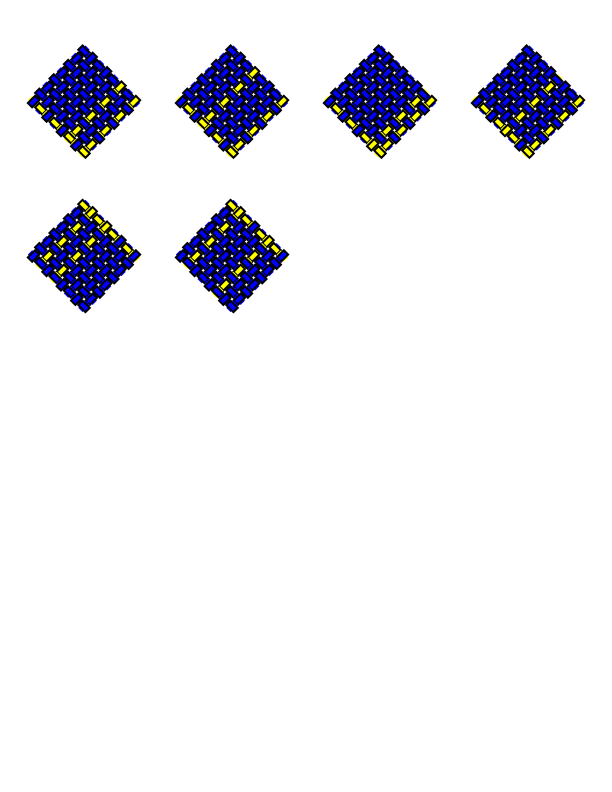

In [295]:
using Luxor
@draw begin
    origin(0,0)
    tiles = Tiler(8.5inch, 11inch, 5, 4)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (tiles.currentrow == 1)
            grid= fillGrid(8, bracelets[1+1][tiles.currentrow, :], bracelets[2+1][tiles.currentcol, :], ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentrow == 2) && (symmtypes[1+1][tiles.currentrow-1]*symmtypes[2+1][tiles.currentcol] != -1)
            grid= fillGrid(8, reverse(bracelets[1+1][tiles.currentrow-1, :]), 
                reverse(circshift(bracelets[2+1][tiles.currentcol, :], -1)), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
     end
    end 8.5inch 11inch

24 plus 4 spots, 6 total

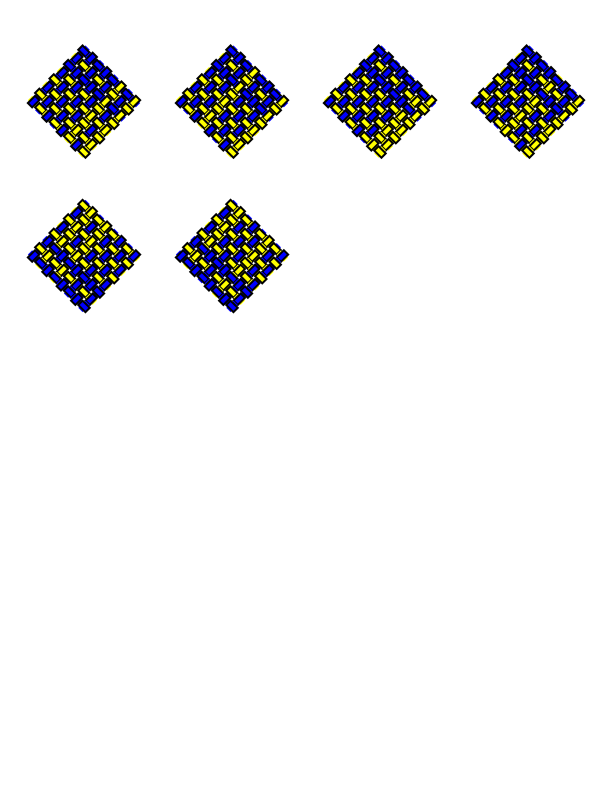

In [296]:
using Luxor
@draw begin
    origin(0,0)
    tiles = Tiler(8.5inch, 11inch, 5, 4)
    left = 6
    right = 2
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (tiles.currentrow == 1)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentrow == 2) && (symmtypes[left+1][tiles.currentrow-1]*symmtypes[right+1][tiles.currentcol] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow-1, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol, :], -1)), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
     end
    end 8.5inch 11inch

8 plus 8 spots, 12 total

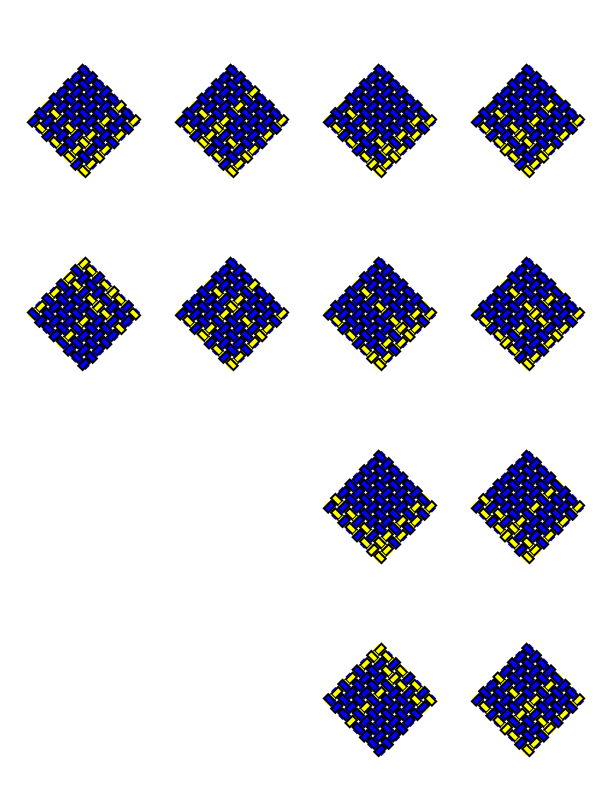

In [297]:
using Luxor
@draw begin
    left = 2
    right = 2
    origin(0,0)
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 4, 4)
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentcol >= tiles.currentrow)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
            elseif (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
    end
    end 8.5inch 11inch

24 plus 8 spots, 12 total


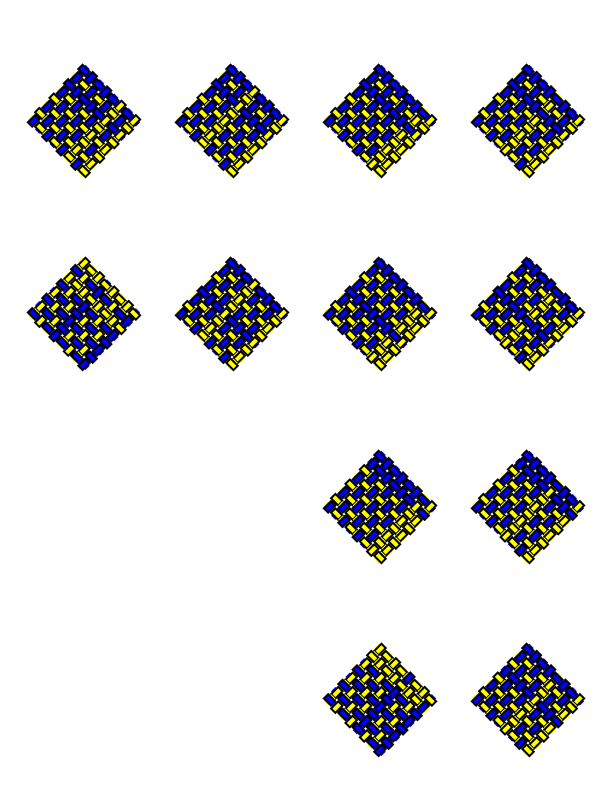

In [298]:
using Luxor
@draw begin
    left = 6
    right = 2
    origin(0,0)
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 4, 4)
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentcol >= tiles.currentrow)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
            elseif (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
    end
    end 8.5inch 11inch

12 plus 4 spots, 10 total:  not interesting


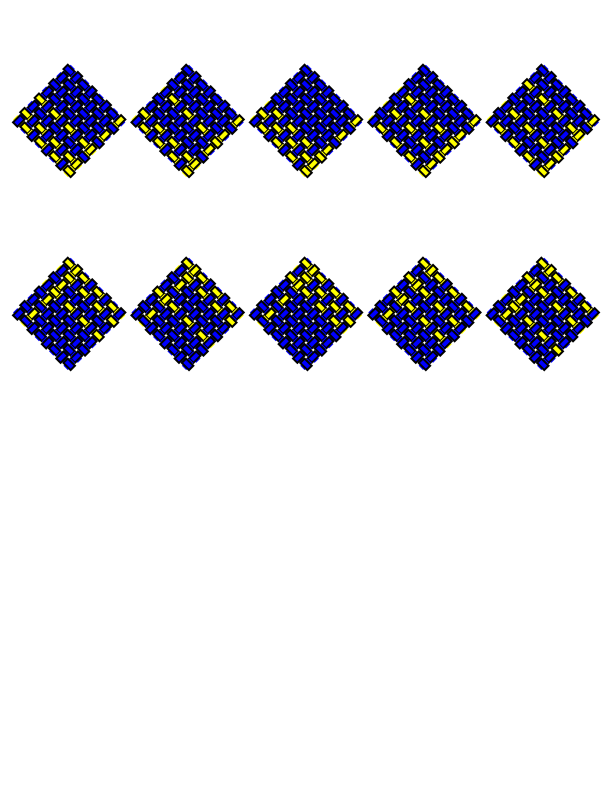

In [300]:
using Luxor
@draw begin
    origin(0,0)
    tiles = Tiler(8.5inch, 11inch, 4, 5)
    left = 3
    right = 1
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentrow == 1)
            grid= fillGrid(8, bracelets[left+1][tiles.currentcol, :], bracelets[right+1][tiles.currentrow, :], 
                ["blue", "yellow"])
        elseif (tiles.currentrow == 2) && 
                            (symmtypes[left+1][tiles.currentcol]*symmtypes[right+1][tiles.currentrow-1] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentcol, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentrow-1, :], -1)), 
                ["blue", "yellow"])
        end
        drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))

     end
    end 8.5inch 11inch

20 plus 4 spots, 10 total:  not interesting


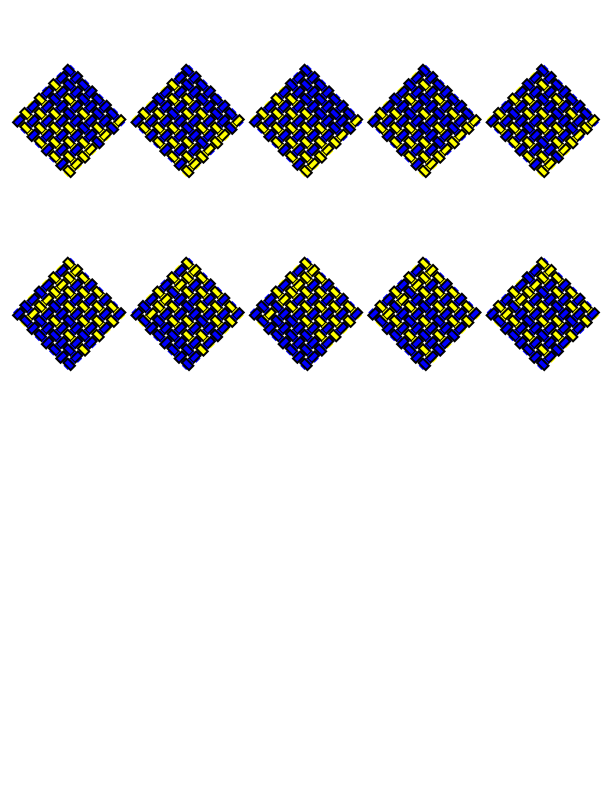

In [302]:
using Luxor
@draw begin
    origin(0,0)
    tiles = Tiler(8.5inch, 11inch, 4, 5)
    left = 5
    right = 1
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentrow == 1)
            grid= fillGrid(8, bracelets[left+1][tiles.currentcol, :], bracelets[right+1][tiles.currentrow, :], 
                ["blue", "yellow"])
        elseif (tiles.currentrow == 2) && 
                                    (symmtypes[left+1][tiles.currentcol]*symmtypes[right+1][tiles.currentrow-1] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentcol, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentrow-1, :], -1)), 
                ["blue", "yellow"])
        end
        drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))

     end
    end 8.5inch 11inch

16 plus 4 spots, 13 total

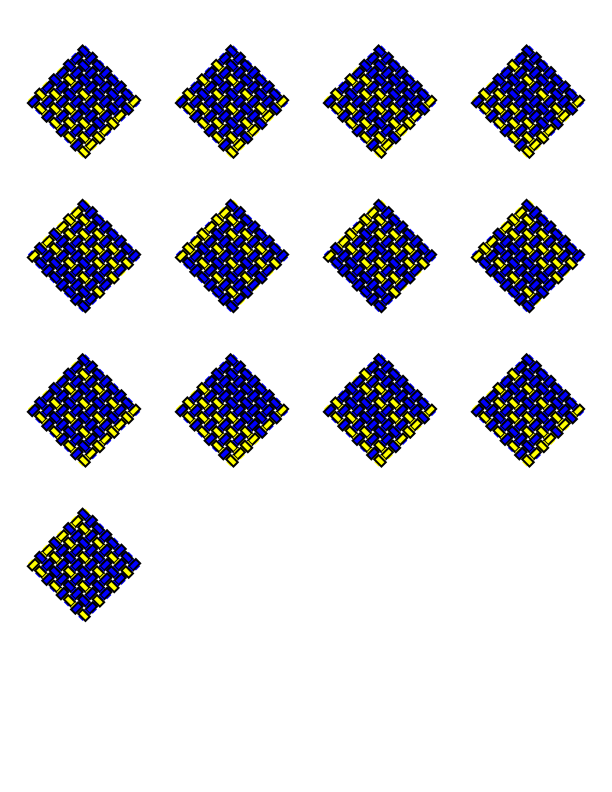

In [303]:
using Luxor
@draw begin
    origin(0,0)
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 5, 4)
    right = 1
    left = 4
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (tiles.currentrow == 1)
            grid= fillGrid(8, bracelets[left+1][tiles.currentcol, :], bracelets[right+1][tiles.currentrow, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentrow == 2) && (symmtypes[right+1][tiles.currentrow-1]*symmtypes[left+1][tiles.currentcol] != -1)
            grid= fillGrid(8, reverse(circshift(bracelets[left+1][tiles.currentcol, :], -1)), 
                reverse(bracelets[right+1][tiles.currentrow-1, :]), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentrow == 3)
            grid= fillGrid(8, bracelets[left+1][tiles.currentcol+4, :], bracelets[right+1][tiles.currentrow-2, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentrow == 4) && (symmtypes[right+1][tiles.currentrow-3]*symmtypes[left+1][tiles.currentcol+4] != -1)
            grid= fillGrid(8, reverse(circshift(bracelets[left+1][tiles.currentcol+4, :], -1)), 
                reverse(bracelets[right+1][tiles.currentrow-3, :]), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
     end
    end 8.5inch 11inch

12 plus 8 spots, 34 total

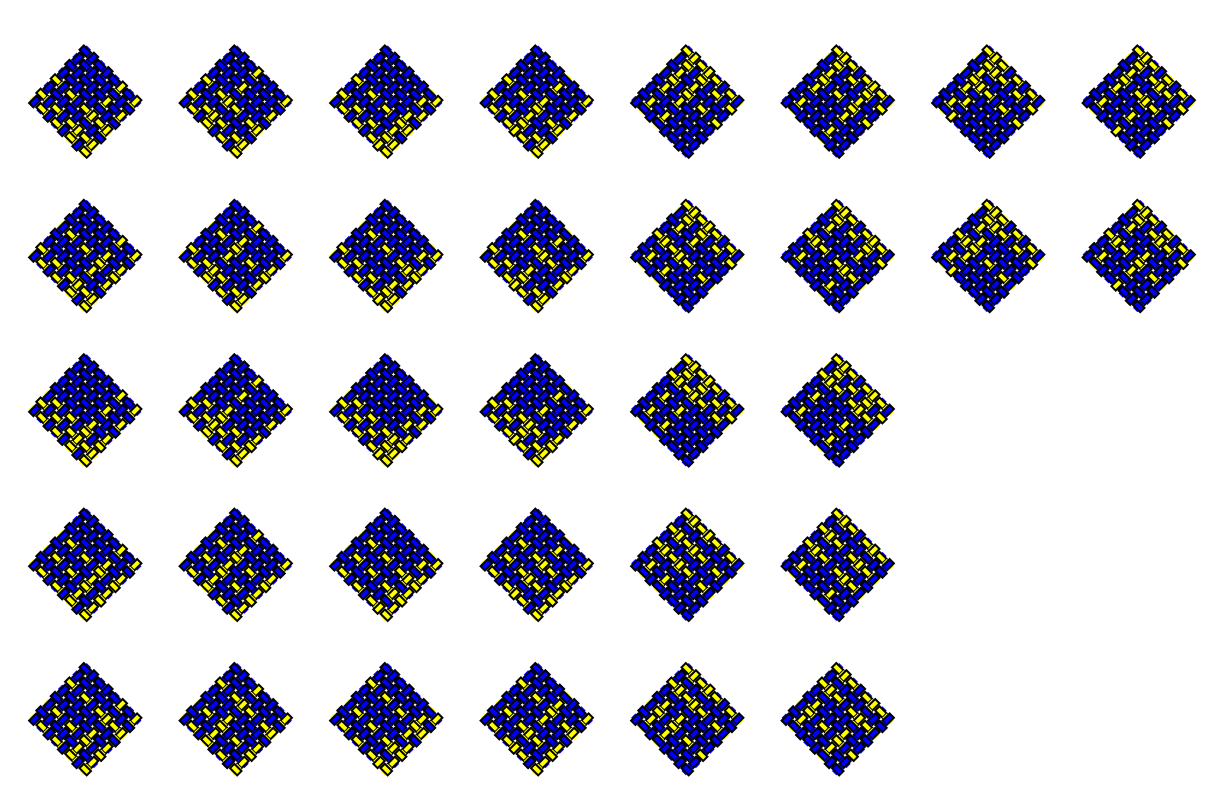

In [304]:
using Luxor
@draw begin
    origin(0,0)
    tiles = Tiler(17inch, 11inch, 5, 8)
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (tiles.currentcol <=4)
            grid= fillGrid(8, bracelets[3+1][tiles.currentrow, :], bracelets[2+1][tiles.currentcol, :], ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (symmtypes[3+1][tiles.currentrow]*symmtypes[2+1][tiles.currentcol-4] != -1)
            grid= fillGrid(8, reverse(bracelets[3+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[2+1][tiles.currentcol-4, :], -1)), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
    end
end 17inch 11inch

20 plus 8 spots, 34 total

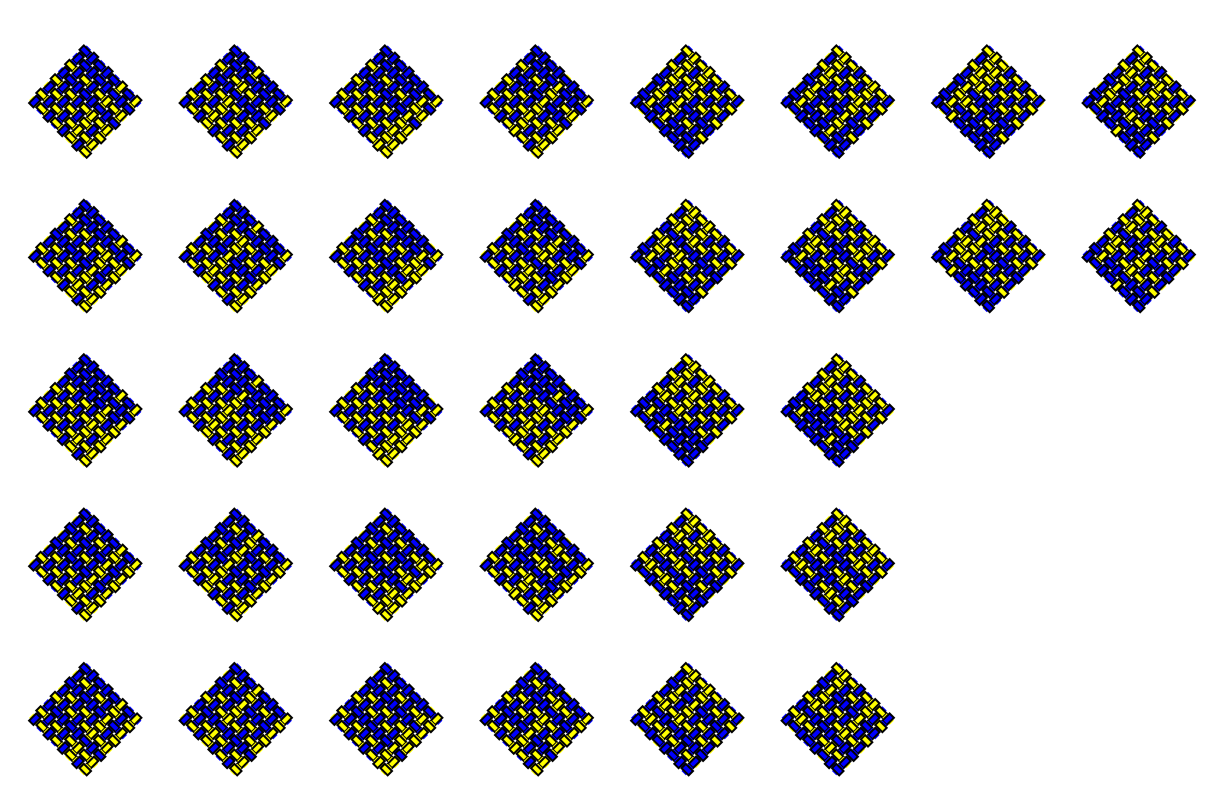

In [305]:
using Luxor
@draw begin
    origin(0,0)
    tiles = Tiler(17inch, 11inch, 5, 8)
    left = 5
    right = 2
    for (pos, i) in tiles
        origin()
        translate(pos)
        if (tiles.currentcol <=4)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol-4] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol-4, :], -1)), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
    end
end 17inch 11inch

16 plus 8 spots, 52 total

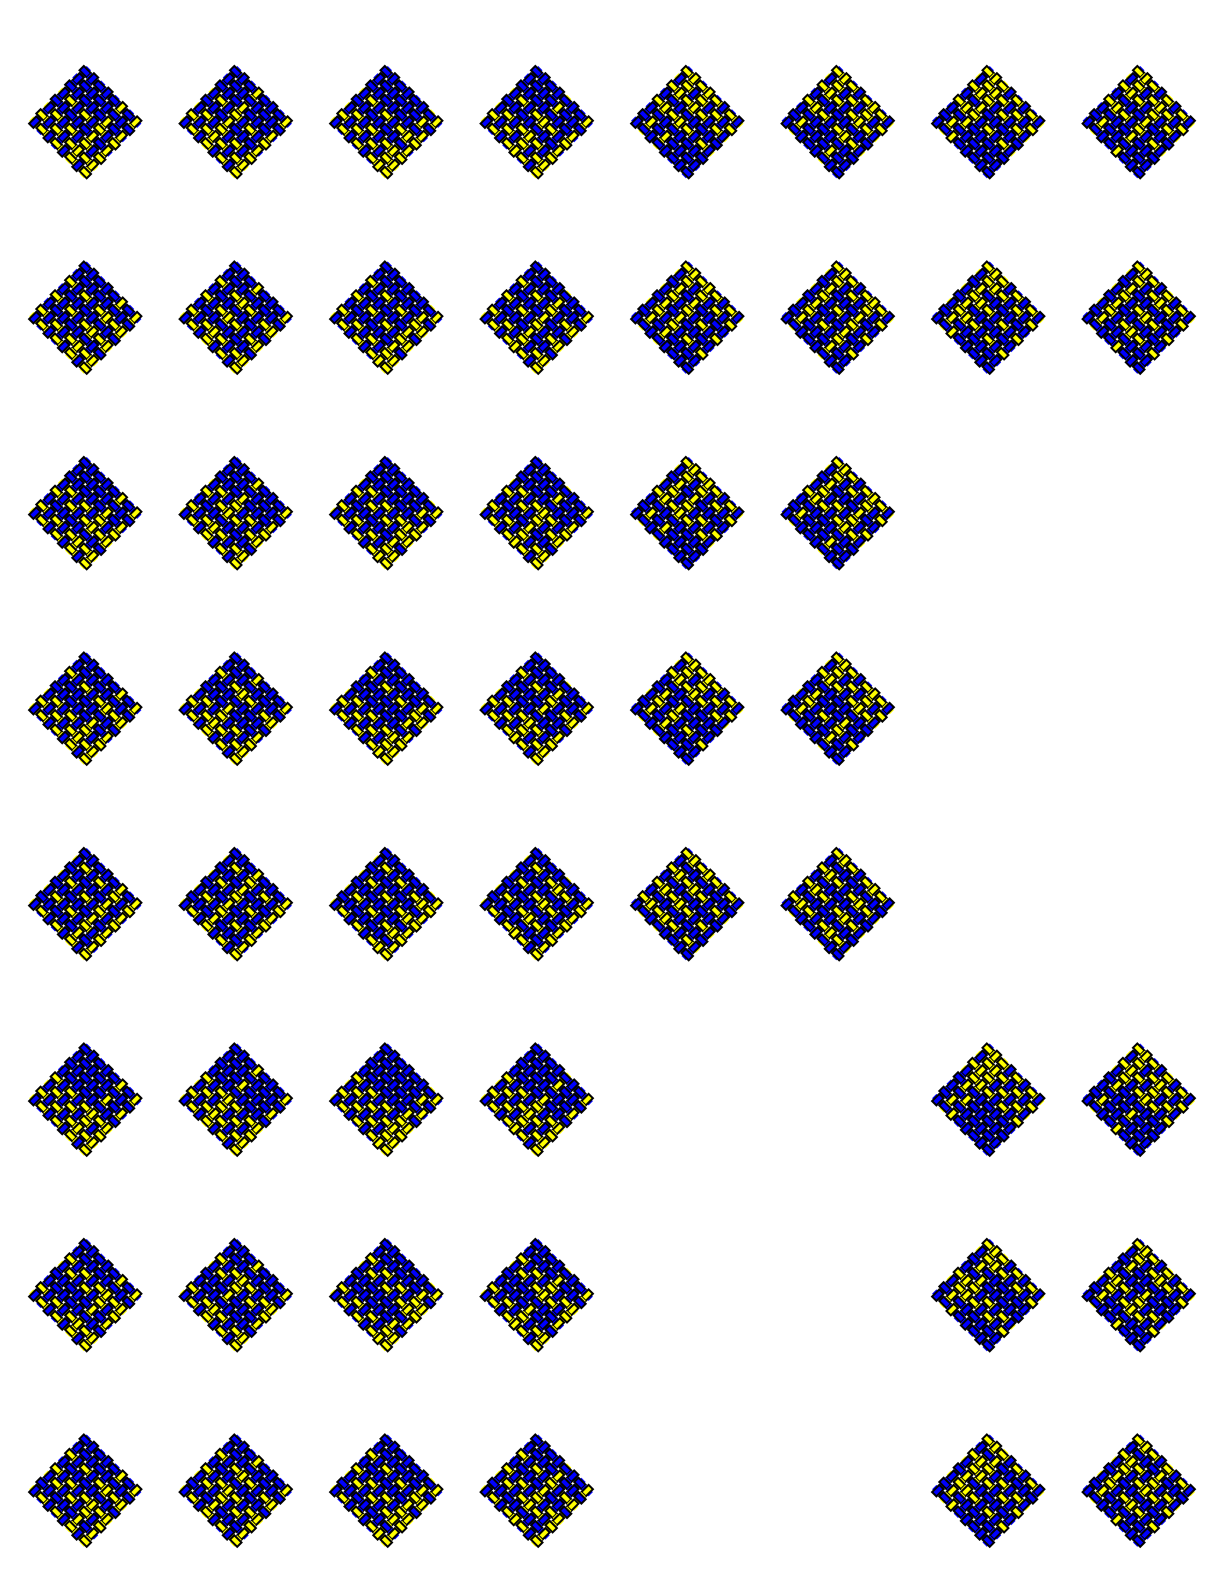

In [306]:
using Luxor
@draw begin
    left = 4
    right = 2
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 8, 8)
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentcol <=4)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
        elseif (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol-4] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol-4, :], -1)), 
                ["blue", "yellow"])
        end
        drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
    end
end 17inch 22inch

12 plus 12 spots, 29 total

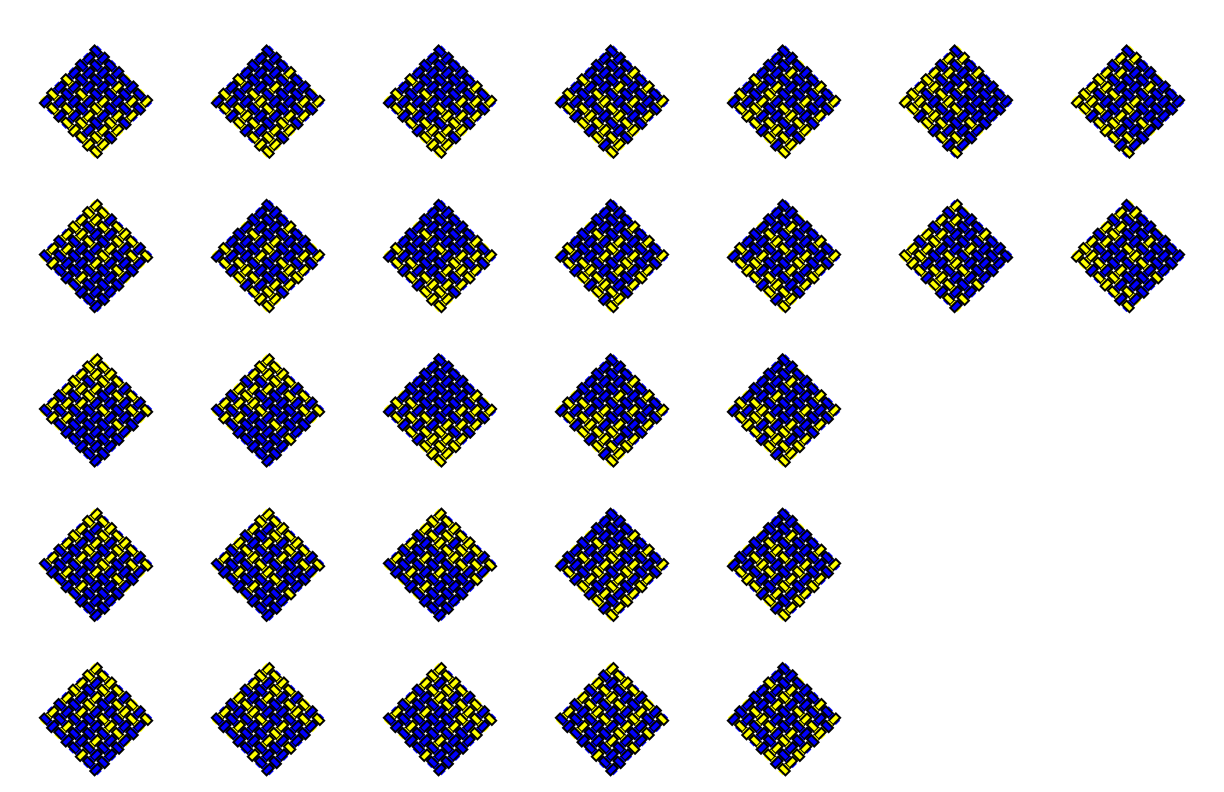

In [312]:
using Luxor
@draw begin
    left = 3
    right = 3
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 5, 7)
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentcol <=5) && (tiles.currentcol >= tiles.currentrow)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentcol <=5) && (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentcol <=7) && (tiles.currentrow <=2) && 
                                        (tiles.currentcol-5 >= tiles.currentrow)
            grid= fillGrid(8, (bracelets[left+1][tiles.currentrow, :]), reverse(bracelets[right+1][tiles.currentcol-5, :]), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentcol <=7) && (tiles.currentrow <=2) && 
                                        (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol-5] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                (circshift(bracelets[right+1][tiles.currentcol-5, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
    end
    end 17inch 11inch

12 plus 20 spots, 29 total

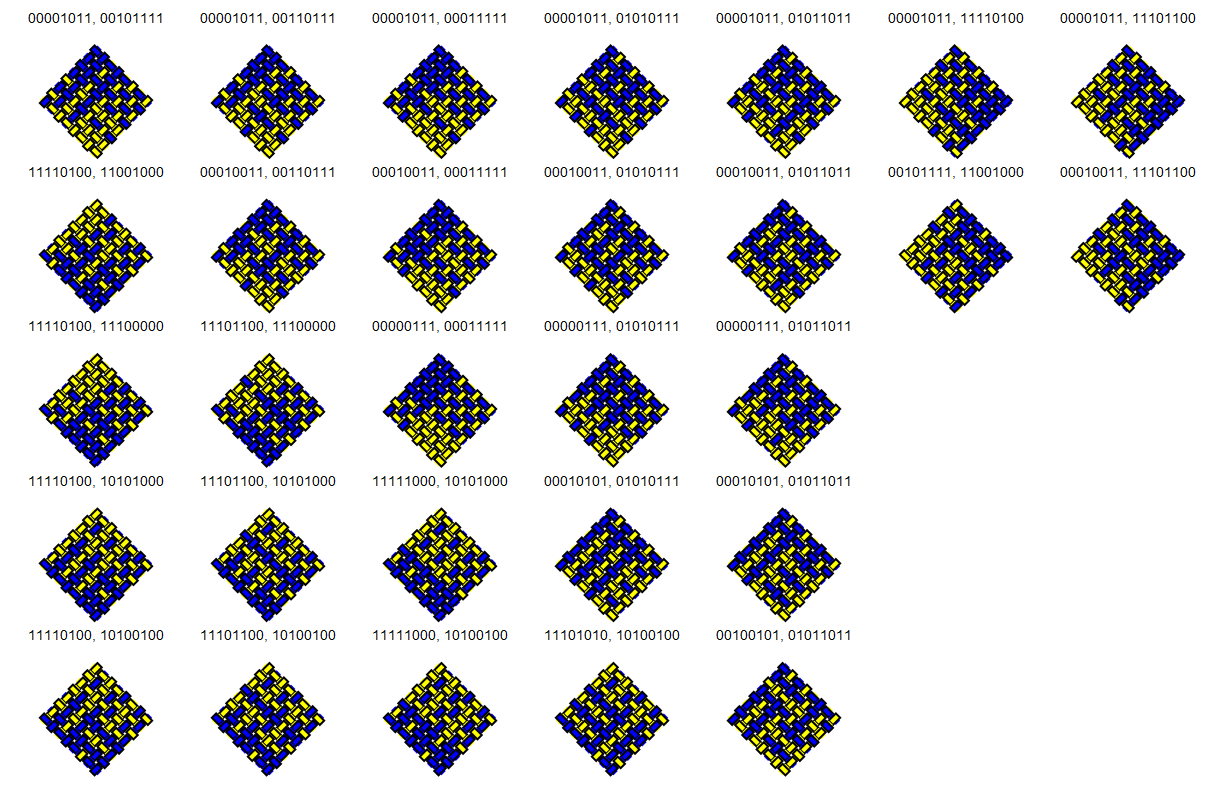

In [335]:
using Luxor
@draw begin
    fontsize(14)
    left = 3
    right = 5
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 5, 7)
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentcol <=5) && (tiles.currentcol >= tiles.currentrow)
            label(string(join(bracelets[left+1][tiles.currentrow, :]), ", ", join(bracelets[right+1][tiles.currentcol, :])), 
                :N, O-(0, 0.8inch))
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentcol <=5) && (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol] != -1)
            label(string(join(reverse(bracelets[right+1][tiles.currentcol, :])), ", ", 
                        join(reverse(bracelets[left+1][tiles.currentrow, :]))), 
                :N, O-(0, 0.8inch))
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentcol <=7) && (tiles.currentrow <=2) && 
                                        (tiles.currentcol-5 >= tiles.currentrow)
            label(string(join(bracelets[left+1][tiles.currentrow, :]), ", ", 
                            join(reverse(bracelets[right+1][tiles.currentcol-5, :]))), 
                :N, O-(0, 0.8inch))
            grid= fillGrid(8, (bracelets[left+1][tiles.currentrow, :]), reverse(bracelets[right+1][tiles.currentcol-5, :]), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentcol <=7) && (tiles.currentrow <=2) && 
                                        (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol-5] != -1)
            label(string(join((bracelets[right+1][tiles.currentcol-5, :])), ", ", 
                        join(reverse(bracelets[left+1][tiles.currentrow, :]))), 
                :N, O-(0, 0.8inch))
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                (circshift(bracelets[right+1][tiles.currentcol-5, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
    end
    end 17inch 11inch

16 plus 12 spots, 79 total

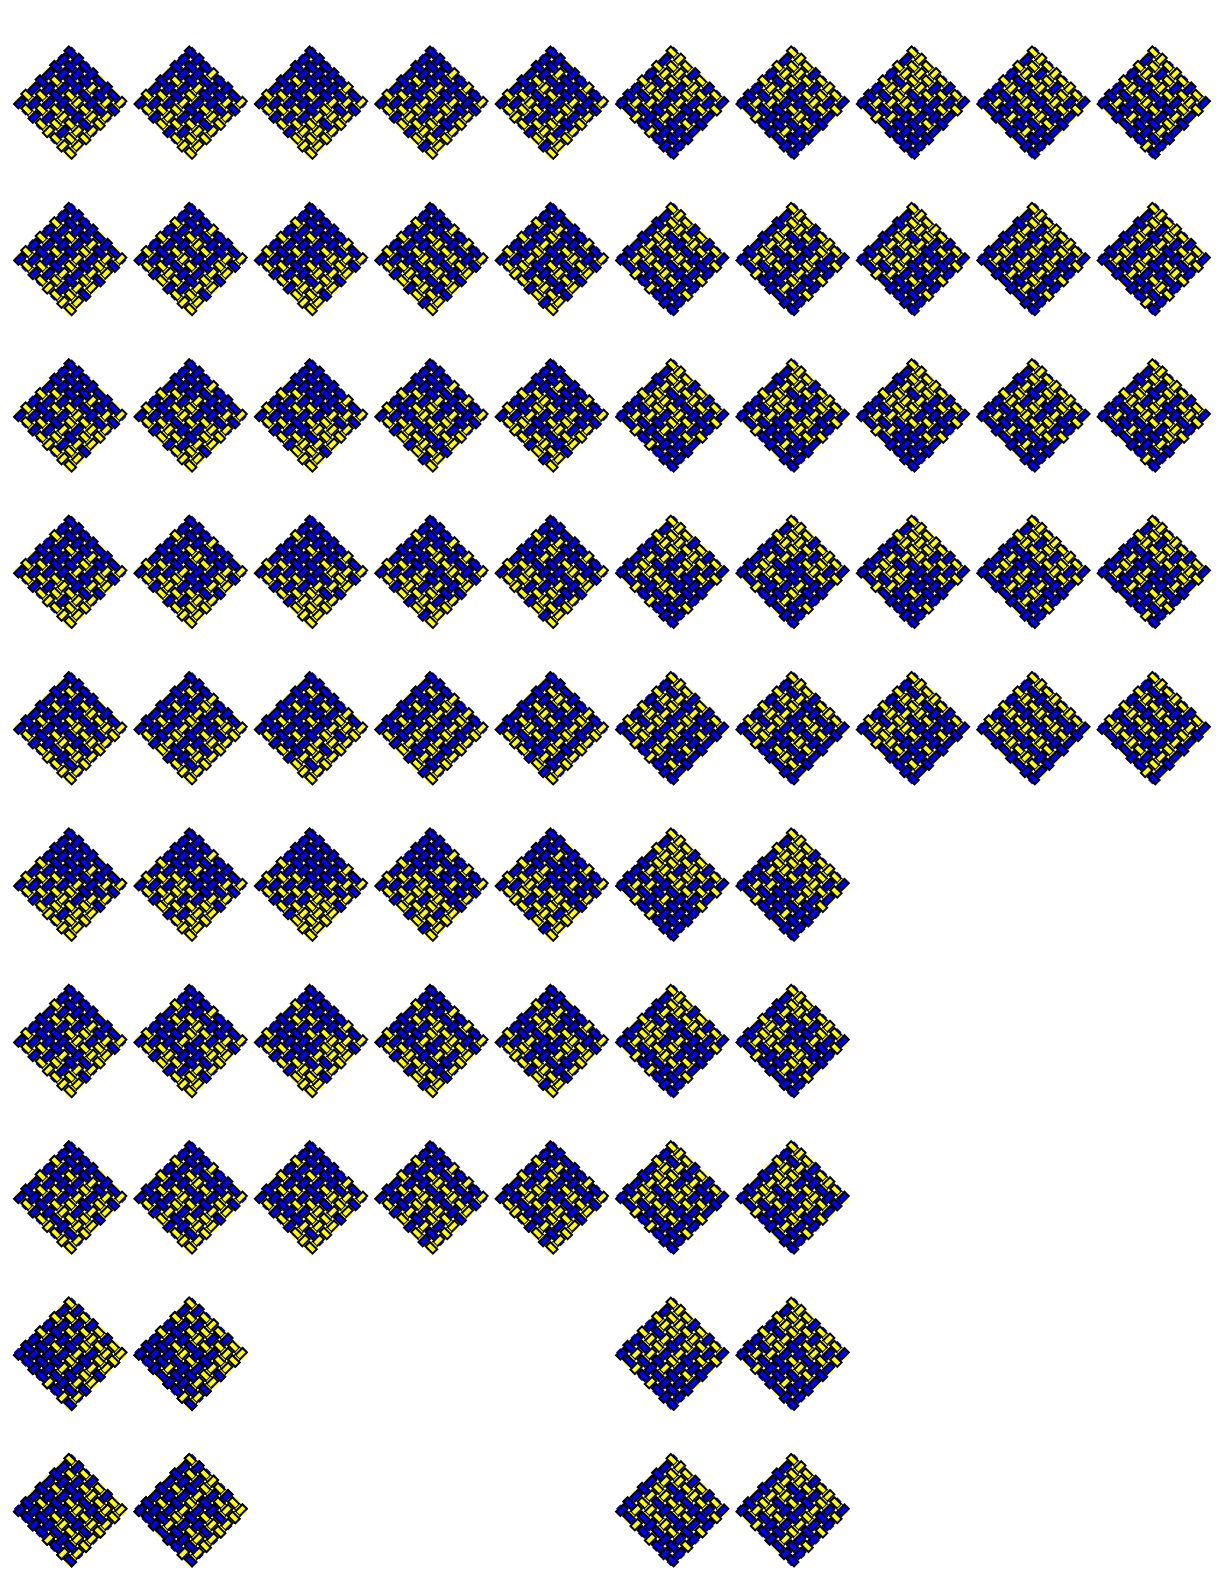

In [342]:
using Luxor
@draw begin
    left = 4
    right = 3
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 10, 10)
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentrow <=8) && (tiles.currentcol <=5)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
        elseif (tiles.currentrow <=8) && 
                            (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol-5] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol-5, :], -1)), 
                ["blue", "yellow"])
        elseif (tiles.currentcol <=2) && (tiles.currentrow >8) 
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow-8, :]), bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (5< tiles.currentcol <=7) && (tiles.currentrow >8) && 
                                        (symmtypes[left+1][tiles.currentrow-8]*symmtypes[right+1][tiles.currentcol-5] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow-8, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol-5, :], -1)), 
                ["blue", "yellow"])    
        end
        drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
    end
    end 17inch 22inch

16 plus 16 spots, 48 total, this is going to be the tricky one!

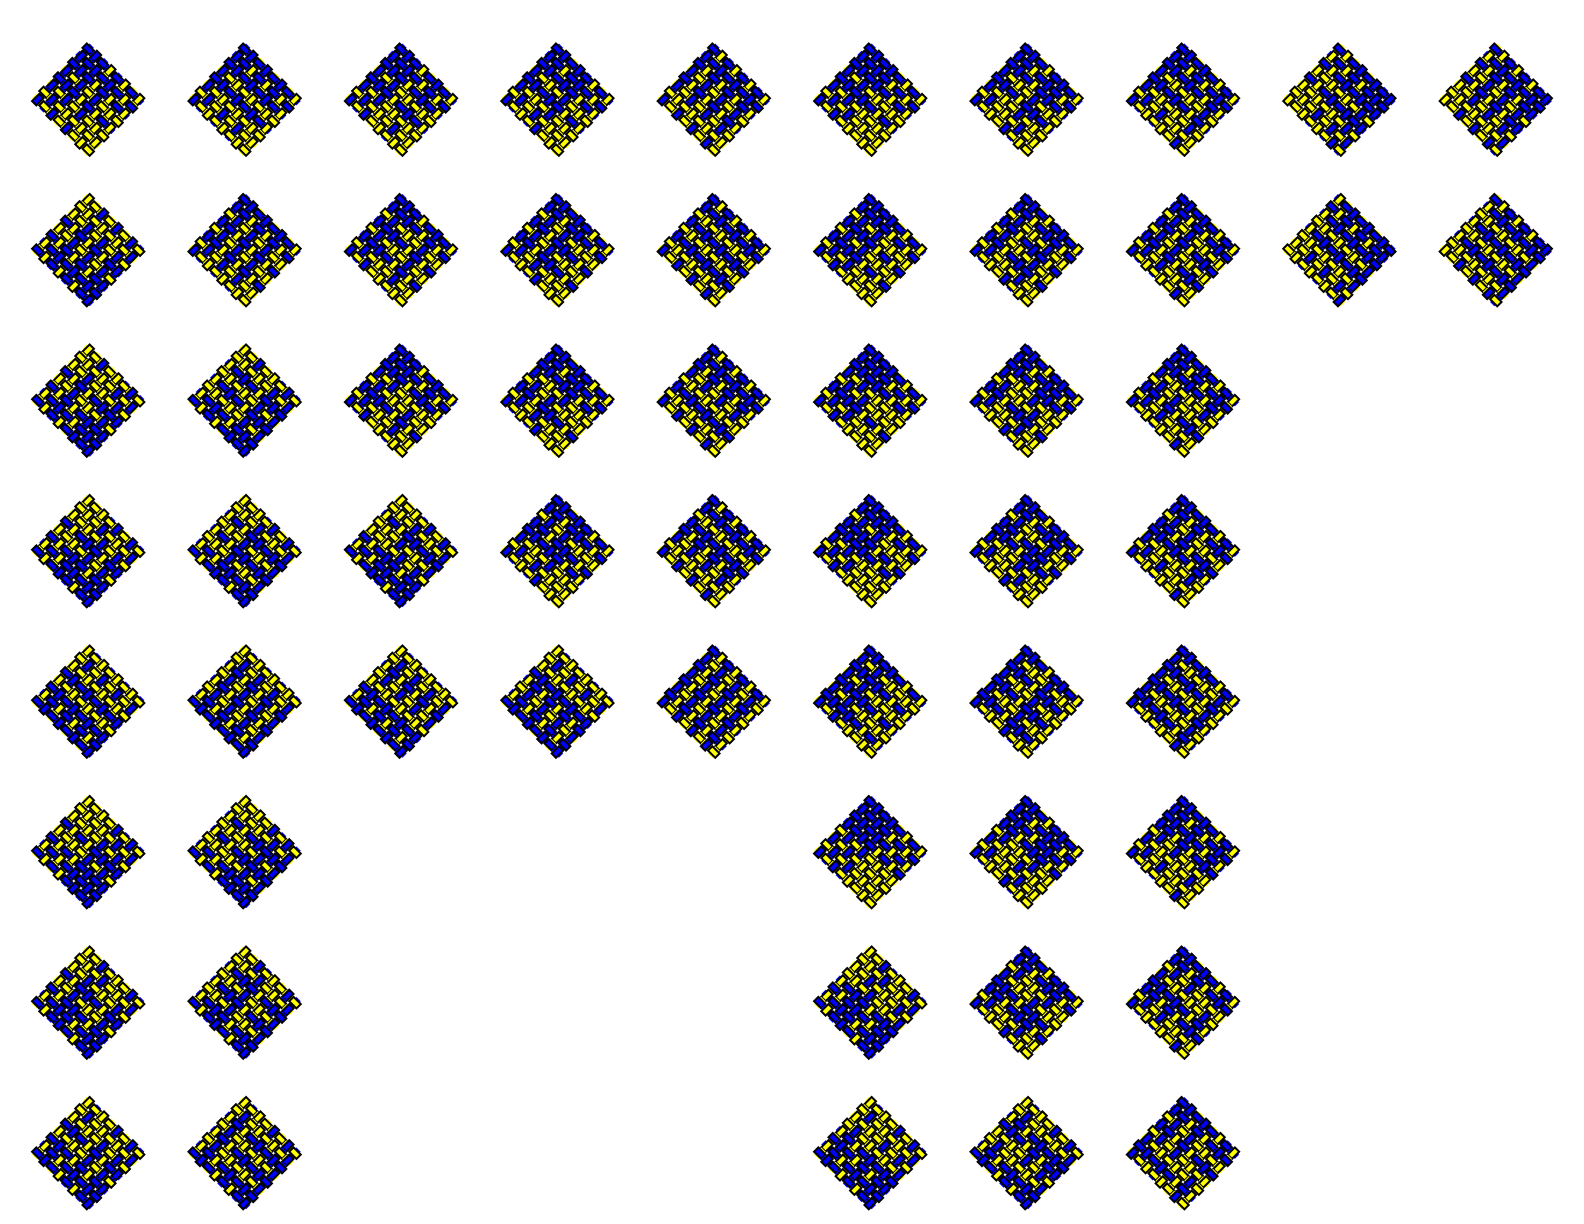

In [344]:
using Luxor
@draw begin
    left = 4
    right = 4
    tiles = Tiler(currentdrawing().width, currentdrawing().height, 8, 10)
    for (pos, i) in tiles
        origin()
        translate(pos)
        grid = nothing
        if (tiles.currentcol <=8) && (tiles.currentcol >= tiles.currentrow)
            grid= fillGrid(8, bracelets[left+1][tiles.currentrow, :], bracelets[right+1][tiles.currentcol, :], 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (tiles.currentcol <=8) && (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                reverse(circshift(bracelets[right+1][tiles.currentcol, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (8 < tiles.currentcol <=10) && (tiles.currentrow <=2) && 
                                        (tiles.currentcol-8 >= tiles.currentrow)
            grid= fillGrid(8, (bracelets[left+1][tiles.currentrow, :]), reverse(bracelets[right+1][tiles.currentcol-8, :]), 
                ["blue", "yellow"])
            drawGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        elseif (8 < tiles.currentcol <=10) && (tiles.currentrow <=2) && 
                                        (symmtypes[left+1][tiles.currentrow]*symmtypes[right+1][tiles.currentcol-8] != -1)
            grid= fillGrid(8, reverse(bracelets[left+1][tiles.currentrow, :]), 
                (circshift(bracelets[right+1][tiles.currentcol-8, :], 0)), 
                ["blue", "yellow"])
            evertGrid(8, grid, O-(0, 0.8inch), Point(-0.1inch,0.1inch), Point(0.1inch,0.1inch))
        end
    end
    end 22inch 17inch